In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mylibrary.nnlib as tnn
import mylibrary.datasets as datasets
import mylibrary.splinelib as spline
import matplotlib
%matplotlib inline

In [2]:
default0 = plt.rcParams['figure.figsize']
default0

[6.0, 4.0]

(400, 2) (400, 1)


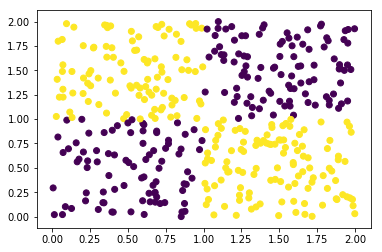

In [3]:
T = 1.
F = 0.

xxx = np.array([[F, F],
      [F, T],
      [T, F],
      [T, T],])
yyy = np.array([[F],[T],[T],[F]])

x = []
y = []
n_data = 400
for i in range(n_data):
    index = np.random.randint(low=0, high=4)
    xx = xxx[index] + np.random.uniform(low=0., high=1, size=xxx[0].size)
#     xx = xxx[index] + np.random.normal(loc=0., scale=0.21, size=xxx[0].size)
    x.append(xx)
    y.append(yyy[index])
x, y = np.array(x), np.array(y)
print(x.shape, y.shape)
plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1))

In [4]:
colors = ['r', 'y', 'g', 'b']
h = 0.01
xx, yy = np.meshgrid(np.arange(x[:,0].min(), x[:,0].max(), h), np.arange(x[:,1].min(), x[:,1].max(), h))
xxyy = np.c_[xx.ravel(), yy.ravel()]

In [5]:
input_size = 2
hidden_1 = 2
output_size = 1
learning_rate = 0.001

optimizer = tnn.Adam(learning_rate)
layer1 = spline.SplineMatrixLayer(input_size, hidden_1, max_points=3)
# layer1 = tnn.LinearLayer(input_size, hidden_1, optimizer=optimizer)
layer2 = spline.SplineVectorLayer(hidden_1, max_points=3)  # 2 -> Linear; 3 -> DoubleRelu
# layer2 = tnn.DoubleReluLayer(hidden_1, optimizer=optimizer)
# layer2 = tnn.LeakyRelu()
layer3 = tnn.NonLinearLayer(hidden_1, output_size, activation=tnn.Sigmoid(), optimizer=optimizer)

_______________________
epoch 0
Loss 0.7728073834442213

_______________________
epoch 100
Loss 0.582463136379273

_______________________
epoch 200
Loss 0.5040032241003481

_______________________
epoch 300
Loss 0.47824082582560223

_______________________
epoch 400
Loss 0.45782210312904686

_______________________
epoch 500
Loss 0.4378560290511655

_______________________
epoch 600
Loss 0.420623199030268

_______________________
epoch 700
Loss 0.4051714107925044

_______________________
epoch 800
Loss 0.3905332139593547

_______________________
epoch 900
Loss 0.3754331827174788

_______________________
epoch 1000
Loss 0.3583303583123858

_______________________
epoch 1100
Loss 0.3385055312175746

_______________________
epoch 1200
Loss 0.3160322892299384

_______________________
epoch 1300
Loss 0.291924093095805

_______________________
epoch 1400
Loss 0.26800905728028235

_______________________
epoch 1500
Loss 0.24520535070618266

_______________________
epoch 1600
Loss 0.224564739

/media/tsuman/98D2644AD2642EA6/Neural_Network/Notebooks/Experimentals/Credit_Assignment/Spline_Neural_Net_dynamic/mylibrary/nnlib.py:36: RuntimeWarning: divide by zero encountered in log
  return -((target * np.log(output) + (1 - target) * np.log(1 - output)).sum(axis=1)).mean()
/media/tsuman/98D2644AD2642EA6/Neural_Network/Notebooks/Experimentals/Credit_Assignment/Spline_Neural_Net_dynamic/mylibrary/nnlib.py:36: RuntimeWarning: invalid value encountered in multiply
  return -((target * np.log(output) + (1 - target) * np.log(1 - output)).sum(axis=1)).mean()


_______________________
epoch 2700
Loss nan

_______________________
epoch 2800
Loss nan

_______________________
epoch 2900
Loss nan

_______________________
epoch 3000
Loss nan

_______________________
epoch 3100
Loss nan

_______________________
epoch 3200
Loss nan

_______________________
epoch 3300
Loss nan

_______________________
epoch 3400
Loss nan

_______________________
epoch 3500
Loss nan

_______________________
epoch 3600
Loss nan

_______________________
epoch 3700
Loss nan

_______________________
epoch 3800
Loss nan

_______________________
epoch 3900
Loss nan

_______________________
epoch 4000
Loss nan

_______________________
epoch 4100
Loss nan

_______________________
epoch 4200
Loss nan

_______________________
epoch 4300
Loss nan

_______________________
epoch 4400
Loss nan

_______________________
epoch 4500
Loss nan

_______________________
epoch 4600
Loss nan

_______________________
epoch 4700
Loss nan

_______________________
epoch 4800
Loss nan

__________

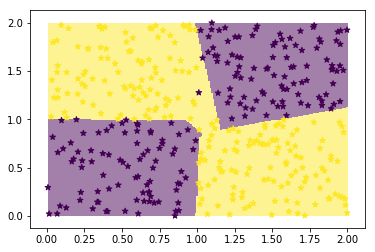

In [6]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ion()
fig.show()
fig.canvas.draw()

for step in range(20000):
    a1 = layer1.forward(x)
    a2 = layer2.forward(a1)
    yout = layer3.forward(a2)
    
    loss = tnn.CrossEntropyBinary.loss(yout, y)
    dy = tnn.CrossEntropyBinary.del_loss(yout, y)
    
    da2 = layer3.backward(dy)
    da1 = layer2.backward(da2)
    dx = layer1.backward(da1)

    layer1.update()
    layer2.update()
    layer3.update()
    
    if step % 100 == 0:
        layer1._maintain_good_spline_()
        layer2._maintain_good_spline_()
        
        print('_______________________')
        print("epoch", step)
        print("Loss", loss)

        ax.clear()

#         out = (yout>0.5).astype(int)
#         plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1), lw=5)
#         plt.scatter(x[:,0], x[:, 1], c=out.reshape(-1), marker='+', cmap=matplotlib.colors.ListedColormap(colors))
        
        a1 = layer1.forward(xxyy)
        a2 = layer2.forward(a1)
        classxy = layer3.forward(a2)
        classxyi = (classxy > 0.5).astype(int)
        plt.imshow(classxyi.reshape(xx.shape), interpolation='nearest',
                   extent=(xx.min(), xx.max(), yy.min(), yy.max()),
                   alpha=0.5,
                   aspect='auto', origin='lower')
        plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1), marker='*')            
    
    
        fig.canvas.draw()
        
        plt.pause(0.01)
        print()
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

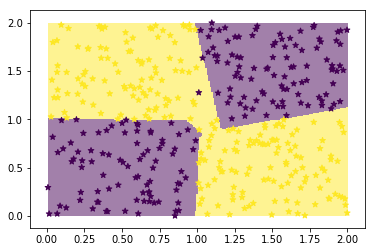

In [7]:
%matplotlib inline
a1 = layer1.forward(xxyy)
a2 = layer2.forward(a1)
classxy = layer3.forward(a2)
classxyi = (classxy > 0.5).astype(int)
plt.imshow(classxyi.reshape(xx.shape), interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           alpha=0.5,
           aspect='auto', origin='lower')
plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1), marker='*')  

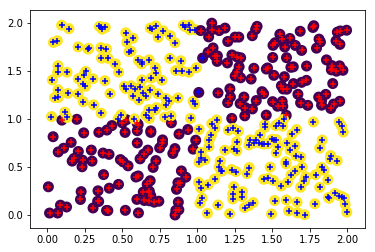

In [8]:
a1 = layer1.forward(x)
a2 = layer2.forward(a1)
yout = layer3.forward(a2)
out = (yout>0.5).astype(int)
plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1), lw=5)
plt.scatter(x[:,0], x[:, 1], c=out.reshape(-1), marker='+', cmap=matplotlib.colors.ListedColormap(colors))

## Visualize neural network layers 

In [9]:
layer3.input.shape

(400, 2)

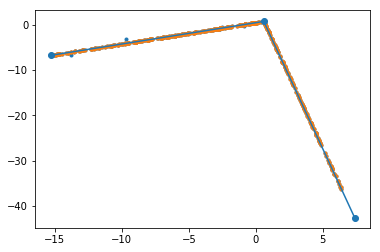

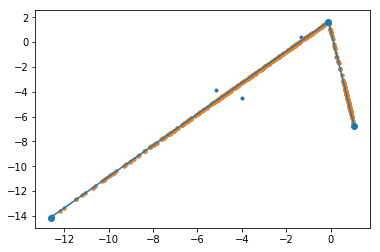

In [10]:
for i in range(layer3.input.shape[1]):
    a1 = layer2.input
    a2 = layer3.input
    da2 = layer2.del_output
    a2_ = a2 - da2
    plt.scatter(a1[:, i], a2_[:, i], marker='.')
    plt.scatter(a1[:, i], a2[:, i], marker='.')
    plt.plot(layer2.spline_list[i].X,  layer2.spline_list[i].Y, marker='o')
    da2[:,i].mean(), da2[:,i].var()
    plt.show()

In [11]:
da2.mean(axis=0)

array([-0.00038646,  0.00050126])

In [12]:
da2.std(axis=0)

array([0.06135583, 0.07958273])

In [13]:
# layer2._increase_pieces_()

## Visualize matrix splines

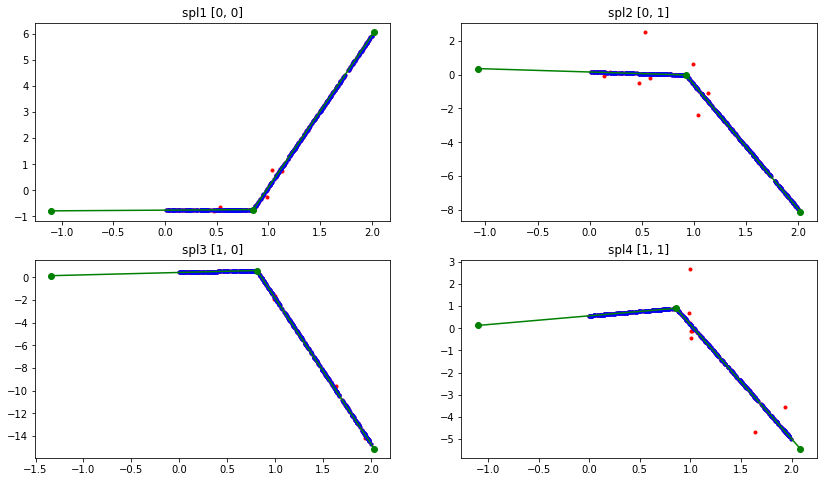

In [14]:
k=1
plt.rcParams['figure.figsize'] = [14, 8]
for i in range(layer1.input_dim):
    for j in range(layer1.output_dim):
        spl = layer1.spline_mat[i,j]
        plt.subplot(2,2,k)
        plt.title(f'spl{k} [{i}, {j}]')
        k+=1
        inp = spl.input
        out = spl.output
        dout = spl.del_output
        out_ = out - dout
        plt.scatter(inp, out_, marker='.', color='r')
        plt.scatter(inp, out, marker='.', color='b')
        plt.plot(spl.X,  spl.Y, marker='o', color='g')
#         plt.show()